# Phase 3 project

## Business Understanding

### Problem Statement
The marketing team in syriatel would like to understand churn trends help them become more competitive against competition. This will help to improve their customer acquistion and retention strategy

### Objectives
1. Understanding the reasons behind customer churn
2. Build a prediction model to help proof the business against churn
3. Reduce churn to improve business performance

### Data Understanding
Below we will perform a series of steps to prepare the data. We will import the data, preview a few rows, then create a class to help us query the data for some basic information

### Importing Data

In [94]:
# perform necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

# load dataset
df = pd.read_csv('data/churn.csv')

# preview first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The code below builds a class `quer_d` that will help us query the data

In [95]:
# build the class

class quer_d:
    
    """ Query dataframe for specific information"""
    
    def __init__(self):
        self.data = data
        
    def dshape(self, data):
        """Simple method to provide the shape of the data"""
        
        return print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')
    
    def dinfo(self, data):
        """Simple method to provide the info of the data"""
        return print(data.info(), '\n')
    
    def dmissing(self, data):
        """ Identify missing values"""
        # identify if data has missing values(data.isnull().any())
        # empty dict to store missing values
        missing = []
        for i in data.isnull().any():
            # add the bool values to empty list 
            missing.append(i)
        # covert list to set (if data has missing value, the list should have true and false)
        missing_set = set(missing)
        if (len(missing_set) == 1):
            out = print("The Data has no missing values", '\n')
        else:
            out = print(f"The Data has missing values.", '\n')

        return out
    
    def d_duplic(self, data):
        """method to identify any duplicates"""
        # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
        # empty list to store Bool results from duplicated
        duplicates = []
        for i in data.duplicated():
            duplicates.append(i)
        # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
        duplicates_set = set(duplicates) 
        if (len(duplicates_set) == 1):
            out = print("The Data has no duplicates", '\n')
        else:
            no_true = 0
            for val in duplicates:
                if (val == True):
                    no_true += 1
            # percentage of the data represented by duplicates 
            duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
            out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')
        
        return out
    
    def col_dup(self, data, column):
        """handling duplicates in unique column"""
        # empty list to store the duplicate bools
        duplicates = []
        for i in data[column].duplicated():
            duplicates.append(i)
    
        # identify if there are any duplicates
        duplicates_set = set(duplicates)
        if (len(duplicates_set) == 1):
            out = print(f"The column {column.title()} has no duplicates", '\n')
        else:
            no_true = 0
            for val in duplicates:
                if (val == True):
                    no_true += 1
            # percentage of the data represented by duplicates 
            duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
            out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data", '\n')
        
        return out
    
    def d_describe(self, data):
        
        """method to check the descriptive values of the data"""
        return print(data.describe(), '\n')

Below shows that taining data has 3333 cases and 21 features. There are a mixture of strings, floats and integers
- phone number is saved as string but will need to be converted to numeric
- churn column is saved as boolean, but will be converted to integer
- at first glance, data has no missing values and no duplicates

In [96]:
# instantiate class
inst = quer_d()

inst.dshape(df) # shape
inst.dinfo(df)  # info
inst.dmissing(df) # missing
inst.d_duplic(df) # duplicates
inst.col_dup(df, 'phone number') # unique col duplicates
inst.d_describe(df) # descriptive stats


The DataFrame has:
	* 3333 rows
	* 21 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float

## Data Cleaning
Below we create a class that will:
- convert phone numbers encoded as string to integers
- convert target column encoded as boolean to integer

In [97]:
# create class
class trans:
    """ converting columns to appropriate data type"""
    
    def __init__(self):
        self.data = data
        
    def conv(self, data, col):
        """ convert phone number to integer"""
        data[col] = data[col].str.replace('-', '').astype('int')
        return data
    
    def lab(self, data, col):
        """convert churn col to integer"""
        data[col] = data[col].astype('int')
    
        return data

# instantiate class
chg = trans()      


### Convert Phone Number to Integer
Phone number was saved as a string. The code below will convert it to an integ

In [98]:
# apply instantiated class on dataframe
chg.conv(df, 'phone number')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,3703271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,3288230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,3646381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Convert Churn Column to Integer
The `churn` col is currently encoded as boolean. The function below converts it to a binary variable

In [99]:
# apply instantiated class on dataframe
    
chg.lab(df, 'churn')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,4144276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,3703271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,3288230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,3646381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## Exploratory Data Analysis

### Mismatch: Voicemail and International 
The code below shows that columns `voice mail plan` and `international plan` categories don't match with actual data. Below we analyse day minutes and see that non subscribers have values. We will drop both columns as I believe the actual transactional data will be able to relay the required patterns for the different subscribers

We will also drop the `state` column because the data contains 56 unique states, thus one hot encoding this will be cumbersome. Since the `area code` column also contains geographic information, we'll use this for our model

In [100]:
print(df.groupby('voice mail plan')['total day minutes'].mean(), '\n')
print(df.groupby('international plan')['total intl minutes'].mean())

voice mail plan
no     179.831813
yes    179.626790
Name: total day minutes, dtype: float64 

international plan
no     10.195349
yes    10.628173
Name: total intl minutes, dtype: float64


In [101]:
# function to drop columns

def drp(data, col):
    """drop specified column"""
    data.drop(col, axis=1, inplace=True)
    
    return data

# apply to dataframe

drp(df, ['voice mail plan', 'international plan', 'state'])

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,3824657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,3703271,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,3288230,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,3646381,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


### Churn rate
The data shows a churn rate of 14%, meaning that our target variable is imbalanced. We will therefore have to correct for the imbalances when modeling

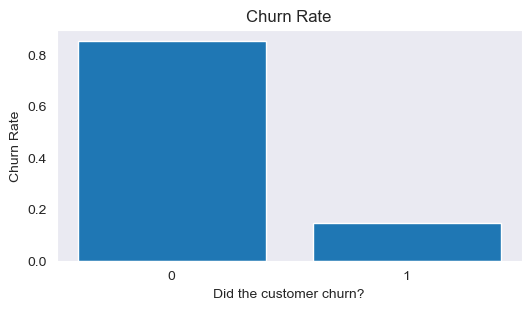

In [114]:
# plot the churn rate
fig, ax = plt.subplots(figsize=(6, 3))

plt.bar(df.churn.value_counts(normalize=True).index, df.churn.value_counts(normalize=True).values)
plt.xticks([0, 1])
plt.title('Churn Rate')
plt.xlabel('Did the customer churn?')
plt.ylabel('Churn Rate');


### Geographic Distribution
Roughly half of the subscribers are located in area code 415. The remainder are evenly distributed between 408 and 510

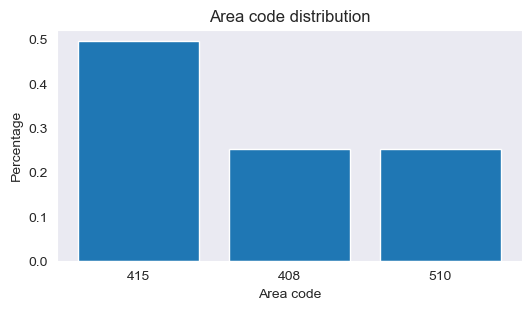

In [133]:
# regional distribution
fig, ax = plt.subplots(figsize=(6, 3))

plt.bar(['415', '408', '510'], df['area code'].value_counts(normalize=True).values)
plt.title('Area code distribution')
plt.xlabel('Area code')
plt.ylabel('Percentage');

### Customer Service Calls
Calls to customer service is binomially distributed with most people making 1 to 3 calls

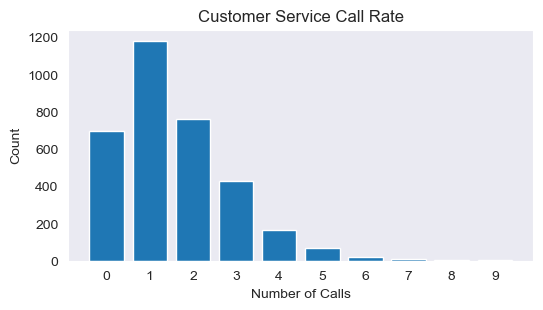

In [137]:
# customer service calls
fig, ax = plt.subplots(figsize=(6, 3))

plt.bar(df['customer service calls'].value_counts().index, df['customer service calls'].value_counts().values)
plt.xticks(df['customer service calls'].value_counts().index)
plt.title('Customer Service Call Rate')
plt.xlabel('Number of Calls')
plt.ylabel('Count');

### How Does Call Duration Vary By Day Part?
Call duration increases by day part, thus evening and night calls last longer than day calls

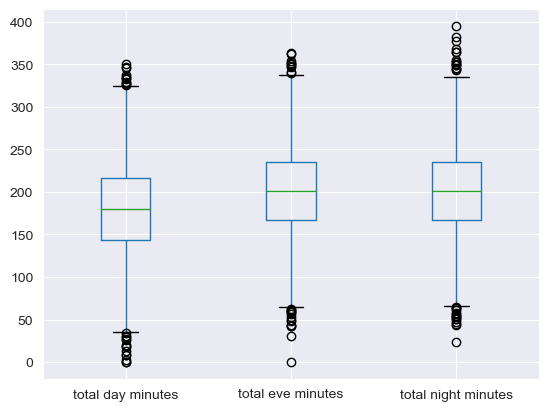

In [141]:
df[['total day minutes', 'total eve minutes', 'total night minutes']].boxplot();

## Modelling
Since our target variable is not continuous, we will consider classification models:
- we will split training and  test data
- standardize the data since the columns have data on varying scales
- start with logistic regression as our basline model, then move on to more sophisticated models
- account for imbalanced classes  in the target variable

In [143]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# split data into features labels
X = df.drop('churn', axis=1)
y = df.churn

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Baseline Model
We start with logistic regression as our baseline model. We will use a pipeline  to streamline our work and balanced class weight to account for class imbalances

In [150]:
# create pipeline
log_p = Pipeline([('scale', StandardScaler()),
                 ('log', LogisticRegression(random_state=0, class_weight='balanced', C=1e12))])

# fit to training data
log_p.fit(X_train, y_train)

# predicted output
y_pred_train = log_p.predict(X_train)
y_pred_test = log_p.predict(X_test)

From the metrics below, we see that our basline model can be  improved. We have a high number of false positives affecting the precision score. However, our key metrics to consider are the accuracy and auc scores

precision: 0.265
recall: 0.714
accuracy: 0.691
AUC: 0.701


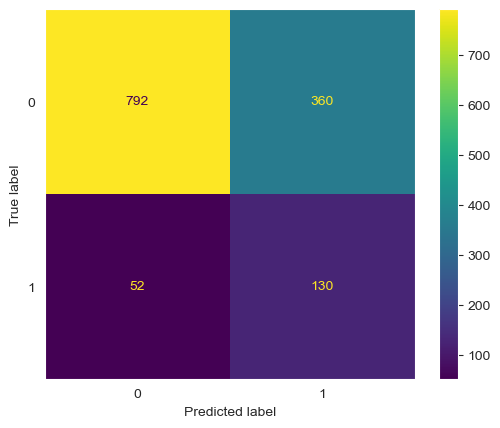

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

# function to print metrics

def clas_score(y, y_pred):
    a = print(f'precision: {round(precision_score(y, y_pred), 3)}')
    b = print(f'recall: {round(recall_score(y, y_pred), 3)}')
    c = print(f'accuracy: {round(accuracy_score(y, y_pred), 3)}')
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    d = print('AUC: {}'.format(round(auc(fpr, tpr), 3)))
    
    return a, b, c, d

clas_score(y_test, y_pred_test)

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test);

### Improved Model: Decision Tree
Next we will use DecisionTree with grid search to look for optimal solutions

In [161]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the pipeline
pipe = Pipeline([('sc', StandardScaler()),
                 ('tree', DecisionTreeClassifier(random_state=123, class_weight='balanced'))])

# Create the grid parameter
grid = [{'tree__max_depth': [None, 2, 6, 10], 
         'tree__min_samples_split': [5, 10]}]


# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# fit to training data
gridsearch.fit(X_train, y_train)

# predicted output
y_h_train = gridsearch.predict(X_train)
y_h_test = gridsearch.predict(X_test)

With Decision Tree classifier, we have been able to improve the metrics as shown below
- accuracy improves from 69% to 85%
- auc score improves from 70% to 73%

precision: 0.471
recall: 0.571
accuracy: 0.854
AUC: 0.735


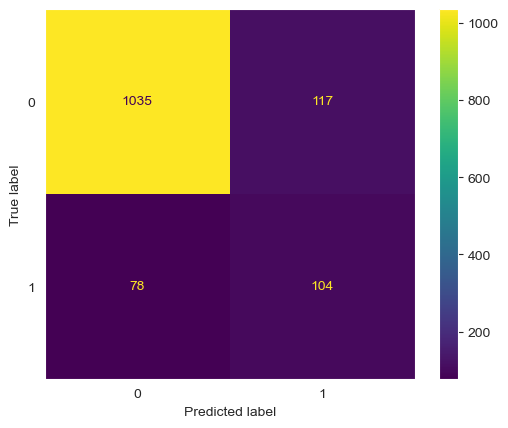

In [162]:
# print metrics
clas_score(y_test, y_h_test)

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_h_test);

In [163]:
gridsearch.best_params_

{'tree__max_depth': None, 'tree__min_samples_split': 5}

### Conclusion and Recommendations
We therefore conclude that a decision tree model of `max_depth` None and `min_samples_split` 5 is the better model at predicting churn

Areas of further investigation include:
- trying other models like ensemble methods
- further tuning of the model
- applying dimensionality reduction to engineer correlated features